In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
from subprocess import Popen
import glob,os,time,sys,math,shutil
import numpy as np
import re
import pandas as pd
from IPython.display import display,clear_output
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
from scipy.stats import gaussian_kde,kde,ks_2samp,entropy
timestr=time.strftime("%m%d")
from matplotlib import colormaps
import warnings
warnings.filterwarnings('ignore')

In [2]:
highsalt_drug_files=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--3.5_Rmudrug--10.1_kd-0.0001/*dat')


In [3]:
all_files_data=[]
max_length=[]
for i, file in enumerate(highsalt_drug_files[0:200]):
     # Start with fewer files
    try:
        #print(f"Processing file {i+1}: {os.path.basename(file)}")
        df = pd.read_csv(file,chunksize=100000)
        for chunk in df:
            if (chunk['NE'].iloc[-1]==120):
                firstmax_sweep=chunk[chunk['NE']==120]['sweep'].iloc[0]
                max_length.append(firstmax_sweep)
                all_files_data.append(chunk[['sweep','NE']])
            else:
                continue
        del df

    
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue

In [4]:
print(len(all_files_data))

46


In [5]:
all_files_data_new=[]
max_sweep=np.max(max_length)
print(max_sweep)
for df in all_files_data:
    if(df['sweep'].iloc[-1]<max_sweep):
        df_extended=pd.DataFrame(columns=['sweep','NE'])
        firstmax_sweep=chunk[chunk['NE']==120]['sweep'].iloc[0]
        df_extended['sweep']=np.arange(round(firstmax_sweep,-2)+100,round(int(max_sweep),-2),100)
        df_extended['NE']=120
        df_new=pd.concat((df,df_extended),ignore_index=True)
        all_files_data_new.append(df_new)
        del df_extended
        del df_new
    else:
        all_files_data_new.append(df)
    del df 



139669000


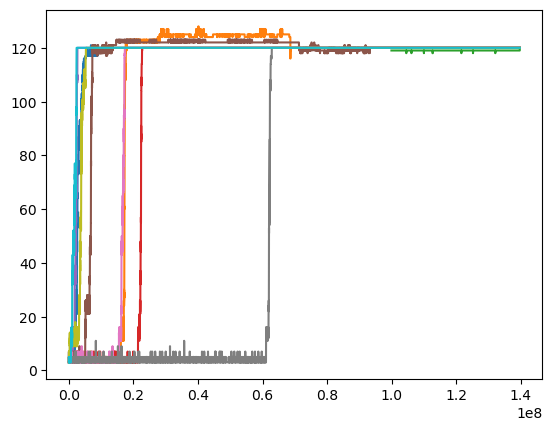

In [6]:
for df in all_files_data_new[0:10]:
    plt.plot(df['sweep'], df['NE'], label='NE vs Sweep')

In [6]:
# Simple approach - just concatenate all data

combined_data=pd.DataFrame()
if all_files_data_new:
    # Concatenate all data
    combined_data = pd.concat(all_files_data_new, ignore_index=True)
    #combined_data['seconds']=combined_data['seconds']*10**(-5) 
    # Group by sweep and calculate mean
    final_result = combined_data.groupby('NE')['sweep'].agg(['mean', 'count']).reset_index()
    final_result2=combined_data.groupby('sweep')['NE'].agg(['mean','count']).reset_index()
    final_result.columns = ['NE', 'average_sweep', 'count']
    final_result2.columns=['Sweep','average_NE','count']
    #print("Final aggregated data:")
    #print(final_result.head(10))
    print(f"Total unique sweeps: {len(final_result2)}")
else:
    print("No data was successfully processed")

Total unique sweeps: 1354861


In [7]:
print(final_result2)
final_resultn=final_result2[final_result2['count']>40]
print(final_resultn)

             Sweep  average_NE  count
0                0    3.000000     45
1             1000    3.266667     45
2             2000    3.088889     45
3             3000    3.355556     45
4             4000    3.177778     45
...            ...         ...    ...
1354856  139675000  120.000000      1
1354857  139676000  120.000000      1
1354858  139677000  120.000000      1
1354859  139678000  120.000000      1
1354860  139678490  120.000000      1

[1354861 rows x 3 columns]
             Sweep  average_NE  count
0                0    3.000000     45
1             1000    3.266667     45
2             2000    3.088889     45
3             3000    3.355556     45
4             4000    3.177778     45
...            ...         ...    ...
1354845  139668500  120.000000     45
1354846  139668600  120.000000     45
1354847  139668700  120.000000     45
1354848  139668800  120.000000     45
1354849  139668900  120.000000     45

[1353965 rows x 3 columns]


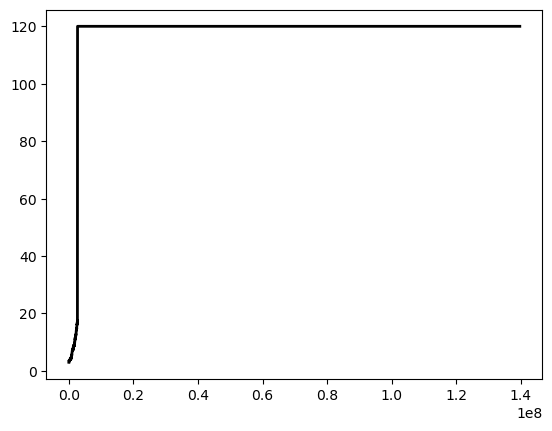

In [12]:
plt.plot(final_resultn['Sweep'][::6], final_resultn['average_NE'][::6], color='black', linewidth=2, label='Average NE')


In [7]:
final_resultn.to_csv('./average_traj_highsalt_wdrug.csv',index=False)

In [7]:
print((all_files_data_new[0]))


            sweep   NE
0               0    3
1            1000    7
2            2000    3
3            3000    5
4            4000    3
...           ...  ...
999956  139678000  120
999957  139678100  120
999958  139678200  120
999959  139678300  120
999960  139678400  120

[999961 rows x 2 columns]


<Axes: xlabel='sweep'>

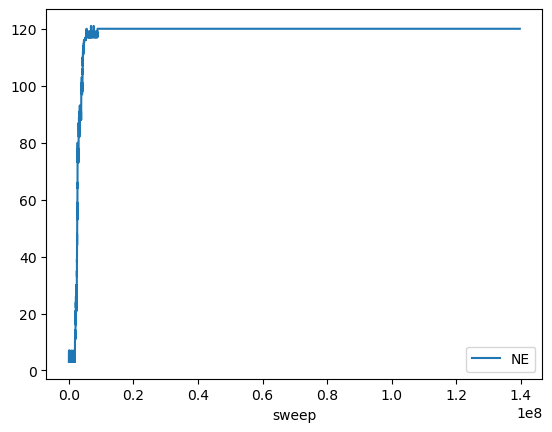

In [17]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

all_files_data_new[0].plot(x='sweep', y='NE', kind='line', alpha=1.0)

23


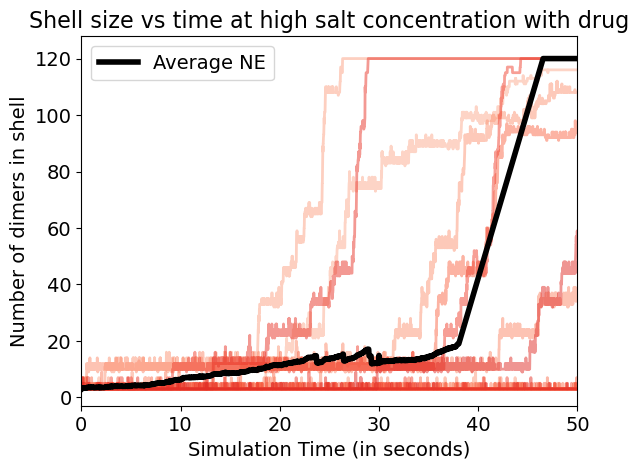

In [11]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()

#df_avg=pd.read_csv('./average_traj_highsalt_wdrug.csv')
#final_resultn=df_avg[df_avg['count']>20]
markerarraystd=mpl.colormaps['Reds'](np.linspace(0.3,0.8,30))
count=0
for df in all_files_data_new[::2]:
    plt.plot(df['sweep'], df['NE'], alpha=0.5, color=markerarraystd[count], linewidth=2,label=None)
    count+=1
print(count)
plt.xlim(0,5.0*10**6)
original_ticks = plt.xticks()[0]
new_labels = [f"{int(tick*10**(-5))}" for tick in original_ticks]
plt.xticks(ticks=original_ticks, labels=new_labels)
plt.plot(final_resultn['Sweep'][::4], final_resultn['average_NE'][::4], color='black', linewidth=4, label='Average NE')
plt.xlabel('Simulation Time (in seconds)',fontsize=14)
plt.ylabel('Number of dimers in shell',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Shell size vs time at high salt concentration with drug', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('shell_size_vs_time_highsalt_wdrug_alternate.png', dpi=300, bbox_inches='tight')

In [ ]:
markerarraystd=mpl.colormaps['Reds'](np.linspace(0.3,0.8,150))
count=0
for df in all_files_data_new[0:40]:
        #print(df['s'].iloc[-1])
        count+=1
        plt.plot(df['sweep'],df['NE'],color=markerarraystd[count],alpha=0.6)
plt.plot(final_resultn['Sweep'],final_resultn['average_NE'],color='black',linewidth=2,label='average trajectory')
#plt.xscale('log')
orginal_ticks = plt.xticks()[0]
new_labels = [f"{int(tick*10**(-5))}" for tick in orginal_ticks]
plt.xticks(orginal_ticks, new_labels)
plt.xlabel('seconds',fontsize=14)

plt.ylabel('NE',fontsize=14)
plt.title('NE vs sweep for std salt concentration without drug',fontsize=16)
plt.legend(fontsize=14,loc='lower right')
plt.show()

: 

In [63]:
# Percentile-based binning (equal frequency bins)
if all_files_data:
    combined_data = pd.concat(all_files_data, ignore_index=True)
    
    # Create quantile-based bins (e.g., 20 bins with equal number of data points)
    n_bins = 20
    combined_data['sweep_quantile'] = pd.qcut(
        combined_data['sweep'], 
        q=n_bins, 
        labels=False
    )
    
    # Get the actual sweep ranges for each quantile
    quantile_ranges = combined_data.groupby('sweep_quantile')['sweep'].agg(['min', 'max']).reset_index()
    quantile_ranges['sweep_range'] = quantile_ranges.apply(
        lambda row: f"{row['min']}-{row['max']}", axis=1
    )
    
    # Calculate statistics for each quantile
    quantile_stats = combined_data.groupby('sweep_quantile')['NE'].agg([
        'mean', 'std', 'count'
    ]).reset_index()
    
    # Merge the results
    quantile_result = pd.merge(quantile_ranges, quantile_stats, on='sweep_quantile')
    
    print("Quantile-based binning:")
    print(quantile_result[['sweep_range', 'mean', 'std', 'count']].head(10))

Quantile-based binning:
       sweep_range       mean        std  count
0         0-198000   5.893983   7.334998  97069
1    198100-396900   8.814403  15.782194  97060
2    397000-599200  10.691156  18.149975  97104
3    599300-805000  15.532179  25.376818  97065
4   805100-1023000  17.409310  28.544493  97056
5  1023100-1258200  19.850191  32.285162  97037
6  1258300-1523100  19.046852  33.148905  97072
7  1523200-1815000  15.287556  30.513054  97063
8  1815100-2127400  13.049959  25.774687  97079
9  2127500-2450800  18.243690  33.185885  97062


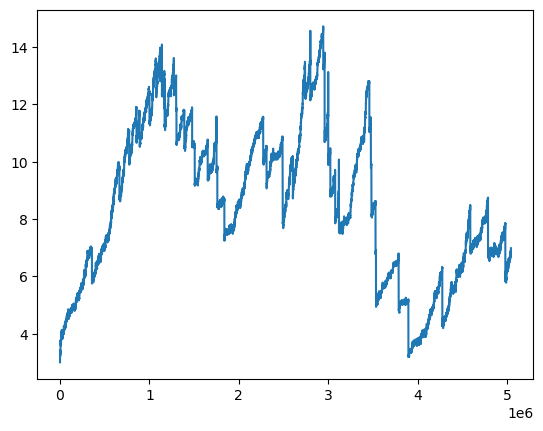

In [26]:
plt.plot(final_aggregated['sweep'],final_aggregated['average_NE'])

In [ ]:
files=glob.glob('0211-HPC/allenergy/*6.5*en*')
print(files)

plt.figure(figsize=[16,10])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t4=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['42','120'] :
            t4+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size)
            #plt.title('T4')
            #sys.exit()
#plt.title('T4, %d trajectories'%t4,fontsize=20);

#plt.figure(figsize=[20,5])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t3=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['32','90']:
            t3+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size,'k')
            plt.xlim([0,100000])
plt.tight_layout()            
#plt.title('T3, %d trajectories'%t3,fontsize=20);
#plt.savefig('../../TrajectoriesT3T4-02.png',dpi=300)
            #sys.exit()            